Лабораторна робота №4
з дисципліни "Нейронні мережі"
виконала студентка групи АнД-31


Під’єднаємо необхідні бібліотеки та завантажимо набір даних.

In [2]:
import os

dataset_name = 'food_classes'
train_direction = os.path.join(os.getcwd(), dataset_name, 'train')
test_direction = os.path.join(os.getcwd(), dataset_name, 'test')

In [3]:
print(train_direction)
print(test_direction)

/home/user/PycharmProjects/нейронки/neural_networks/lab1/lab4/food_classes/train
/home/user/PycharmProjects/нейронки/neural_networks/lab1/lab4/food_classes/test


Обираємо індекси типів страв за варіантом 7:
i1 = n - 1 = 7 - 1 = 6
i2 = n + 29 = 7 + 29 = 36
i3 = n + 59 = 7 + 59 = 66

In [4]:
i1 = 6
i2 = 36
i3 = 66

indexes = [i1, i2, i3]
names = [direction for index, direction in enumerate(os.listdir(test_direction)) if index in indexes]

In [5]:
print(names)

['caesar_salad', 'escargots', 'spaghetti_bolognese']


Створимо генератор зображень для тренувальних та тестових вибірок

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest',
)

За обраними індексами створюємо набір зображень для тренувальної та тестової вибірки

In [8]:
BATCH_SIZE = 25
IMG_SIZE = (200, 200)

validation_image_generator = ImageDataGenerator(rescale=1./255)

training_data = train_image_generator.flow_from_directory(
    directory=train_direction,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    classes=names,
    shuffle=True
)

testing_data = train_image_generator.flow_from_directory(
    directory=test_direction,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    classes=names,
    shuffle=True
)

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


Тренувальна вибірка містить 225 зображень, а тестова – 750.

Шукаємо кількість страв у тренувальній виборці

In [9]:
for name in names:
    path_name = os.path.join(train_direction, name)
    count = len(os.listdir(path_name))
    print(f'Training files for {name}: {count}')

Training files for caesar_salad: 75
Training files for escargots: 75
Training files for spaghetti_bolognese: 75


Зображуємо 5 фото з тренувальної вибірки

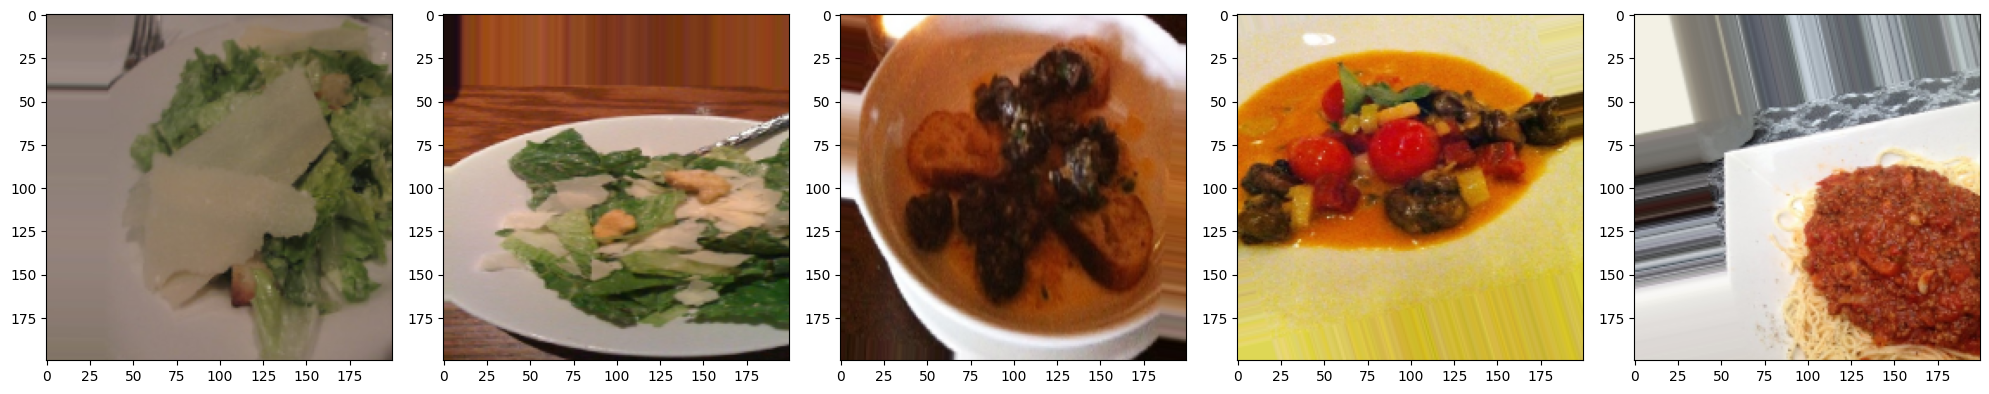

In [10]:
import matplotlib.pyplot as plt

sample_training_images, _ = next(training_data)
fig, axes = plt.subplots(1, 5, figsize=(20, 20))
axes = axes.flatten()
for img, ax in zip(sample_training_images[:5], axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()

Тренуємо модель, використовуючи функції активації софтмакс та релу (на прикладі минулої лабораторної роботи)

In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [14]:
import numpy as np

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    training_data,
    epochs=100,
    steps_per_epoch=int(np.ceil(len(training_data) / float(BATCH_SIZE))),
    validation_data=testing_data,
    validation_steps=int(np.ceil(len(testing_data) / float(BATCH_SIZE))),
)

Epoch 1/100


2023-05-16 17:00:45.918021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step - loss: 1.0245 - accuracy: 0.6400 - val_loss: 1.0978 - val_accuracy: 0.4200
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.0929 - accuracy: 0.3600 - val_loss: 1.0977 - val_accuracy: 0.3400
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.1707 - accuracy: 0.3200 - val_loss: 1.0426 - val_accuracy: 0.4600
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.0223 - accuracy: 0.5600 - val_loss: 1.0414 - val_accuracy: 0.4400
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 1.0605 - accuracy: 0.3600 - val_loss: 1.0522 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 1.0479 - accuracy: 0.4000 - val_loss: 1.0586 - val_accuracy: 0.4000
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 1.0831 - accuracy: 0.2000 - val_loss: 1.0901 - val_accuracy: 0.4000
Epoch 8/100
1/1 [=============================

Зображуємо точність та втрату моделі та на тренувальних та валідаційних даних протягом 100 епох навчання

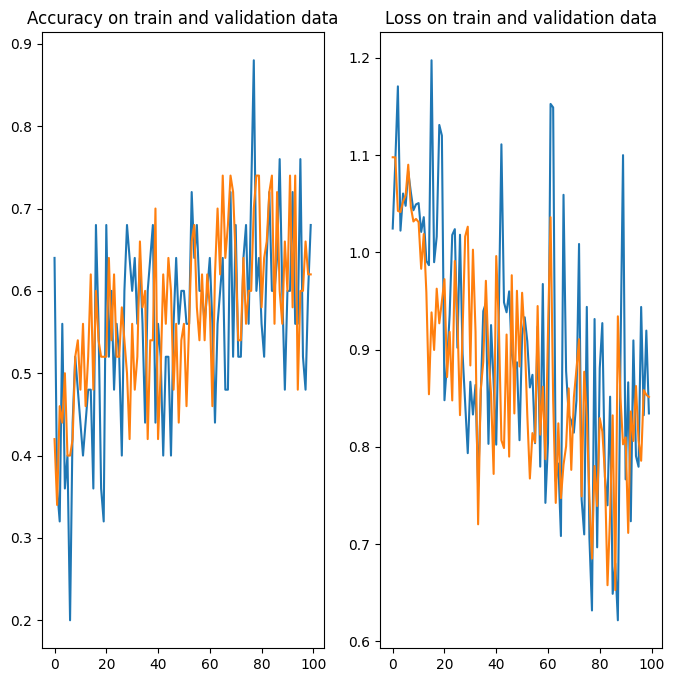

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation accuracy')
plt.title('Accuracy on train and validation data')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Trainining loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.title('Loss on train and validation data')
plt.show()

Зображуємо Confusion_matrix

2023-05-16 17:14:56.494446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


30/30 [==============================] - 5s 170ms/step


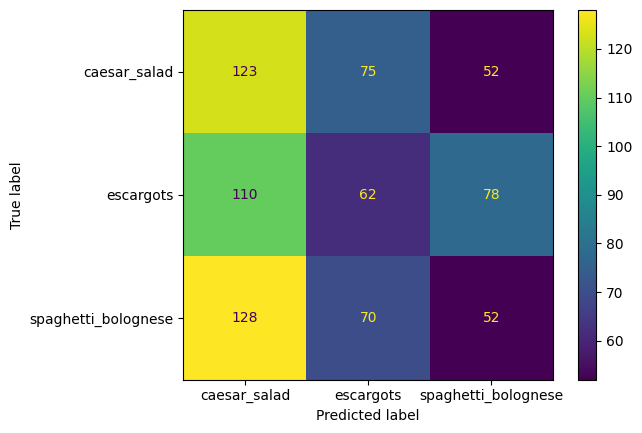

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

prediction = model.predict(testing_data)
prediction = np.argmax(prediction, axis = 1)
confusion_matrix = confusion_matrix(testing_data.classes, prediction)
disaply = ConfusionMatrixDisplay(confusion_matrix, display_labels=names)
disaply.plot()
plt.show()